<a href="https://colab.research.google.com/github/nikilstark/Malaria-parasite-detection/blob/master/malaria_parasite_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers  import Dense,Dropout,Conv2D,MaxPool2D,Flatten,ZeroPadding2D
from tensorflow.keras import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 674M/675M [00:03<00:00, 234MB/s]
100% 675M/675M [00:03<00:00, 218MB/s]


In [0]:
!ls

cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


In [0]:
!unzip -q '/content/cell-images-for-detecting-malaria.zip'

In [0]:
img_width =64
img_height=64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [0]:
%rm -rf '/content/cell_images/cell_images'

In [0]:
train_data_generator = datagen.flow_from_directory('/content/cell_images',
                                                   target_size =(64,64),
                                                   class_mode ='binary',
                                                   batch_size = 16,
                                                   subset = 'training'
)

Found 22048 images belonging to 2 classes.


In [0]:
validation_data_generator = datagen.flow_from_directory('/content/cell_images',
                                                   target_size =(64,64),
                                                   class_mode ='binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
)

Found 5510 images belonging to 2 classes.


In [0]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape =(img_width,img_height,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_data_generator,steps_per_epoch=len(train_data_generator),
                              epochs =5,
                              validation_data =validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 160s 116ms/step - loss: 0.5347 - accuracy: 0.7282 - val_loss: 0.3920 - val_accuracy: 0.8991
Epoch 2/5
1378/1378 [==============================] - 159s 115ms/step - loss: 0.2523 - accuracy: 0.9148 - val_loss: 0.1972 - val_accuracy: 0.9334
Epoch 3/5
1378/1378 [==============================] - 158s 115ms/step - loss: 0.2106 - accuracy: 0.9323 - val_loss: 0.2061 - val_accuracy: 0.9196
Epoch 4/5
1378/1378 [==============================] - 159s 115ms/step - loss: 0.1919 - accuracy: 0.9412 - val_loss: 0.1735 - val_accuracy: 0.9381
Epoch 5/5
1378/1378 [==============================] - 158s 115ms/step - loss: 0.1789 - accuracy: 0.9457 - val_loss: 0.1725 - val_accuracy: 0.9356


In [0]:
def plot_learningcurve(history,epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

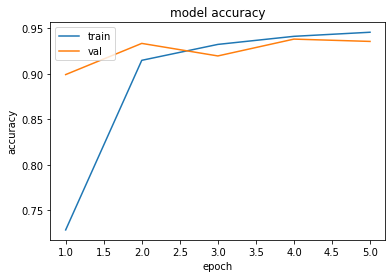

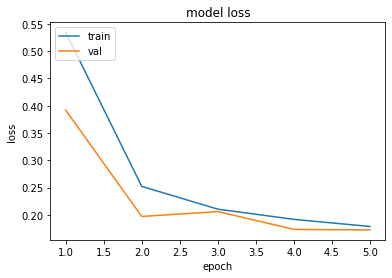

In [0]:
plot_learningcurve(history,5)